In [1]:
# Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CIFAR-10 dataset, returns 4 numpy arrays
(images_train, labels_train), (images_test, labels_test) = datasets.cifar10.load_data()

# For example, images_train is a numpy array containing the training images from the dataset.
# It has a shape of (50000, 32, 32, 3)
# 50,000 is the number of training samples
# each sample is a 32 x 32 image
# and there are 3 color channels (red, green, and blue)
print("Training Image Details:", images_train.shape)
# labels_train is a numpy array containing the corresponding labels for the training images. 
# It has a shape of (50000)
# each value is an integer representing the class label for the corresponding image in images_train
print("Training Label Details:", labels_train.shape)
# The same applies for the test images and labels
print("Test Image Details:", images_test.shape) 
print("Test Label Details:", labels_test.shape) 

Training Image Details: (50000, 32, 32, 3)
Training Label Details: (50000, 1)
Test Image Details: (10000, 32, 32, 3)
Test Label Details: (10000, 1)


Numpy array representation of the first training image:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

Visual representation of the first training image:


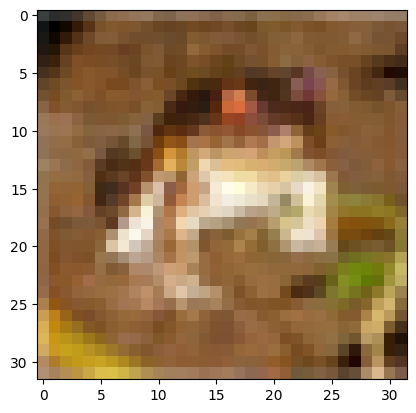

In [3]:
print("Numpy array representation of the first training image:")
print(images_train[0])
print()

print("Visual representation of the first training image:")
plt.imshow(images_train[0])

In [4]:
# Quick code snippet for data exploration

# Turn numpy array of labels into a one dimensional array.
labels_train = labels_train.reshape(-1,)
labels_test = labels_test.reshape(-1,)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# x is a numpy array of training images
# y is the corresponding numpy array of training labels
# index specifies which training image to plot
def plot_sample(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

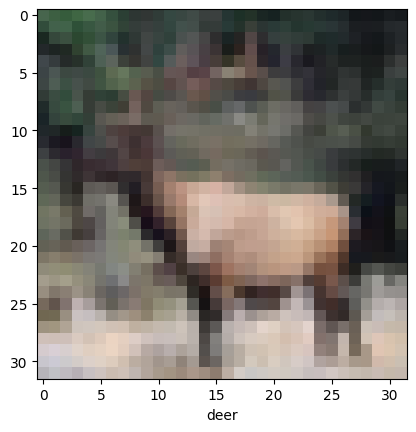

In [5]:
# Now we can easily plot some images
plot_sample(images_train, labels_train, 175)

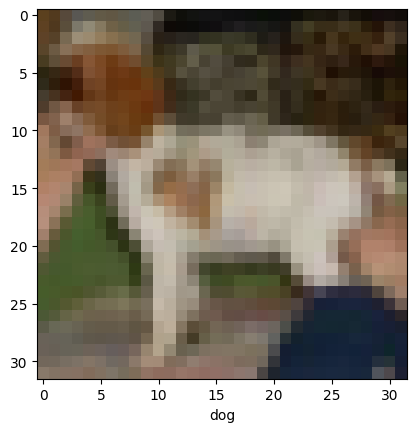

In [6]:
plot_sample(images_test, labels_test, 12)

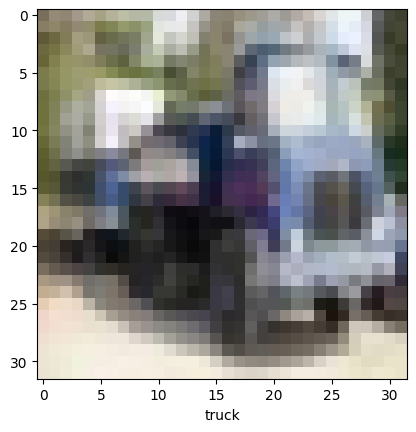

In [7]:
plot_sample(images_test, labels_test, 28)

In [8]:
# Normalize the data by dividing each pixel value in the images by 255
# obtaining a number ranging from 0 to 1

# Example:
print("Normalized numpy array of the first image in training set")
print(images_train[0] / 255)

images_train = images_train / 255
images_test = images_test / 255

Normalized numpy array of the first image in training set
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.

In [9]:
# Building a Convolutional Neural Network
cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
# Compile the model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [11]:
# Train the model
history = cnn.fit(images_train, labels_train, validation_data=(images_test, labels_test), epochs=8)

Epoch 1/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4798 - accuracy: 0.4666 - val_loss: 1.1862 - val_accuracy: 0.5801
Epoch 2/8
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1120 - accuracy: 0.6114 - val_loss: 1.0751 - val_accuracy: 0.6328
Epoch 3/8
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9803 - accuracy: 0.6614 - val_loss: 0.9805 - val_accuracy: 0.6622
Epoch 4/8
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8941 - accuracy: 0.6905 - val_loss: 0.9274 - val_accuracy: 0.6862
Epoch 5/8
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8276 - accuracy: 0.7125 - val_loss: 0.9045 - val_accuracy: 0.6902
Epoch 6/8
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7719 - accuracy: 0.7326 - val_loss: 0.9064 - val_accuracy: 0.6914
Epoch 7/8
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7241 - accuracy: 0.7488 - val_loss: 0.8675 - val_accuracy:

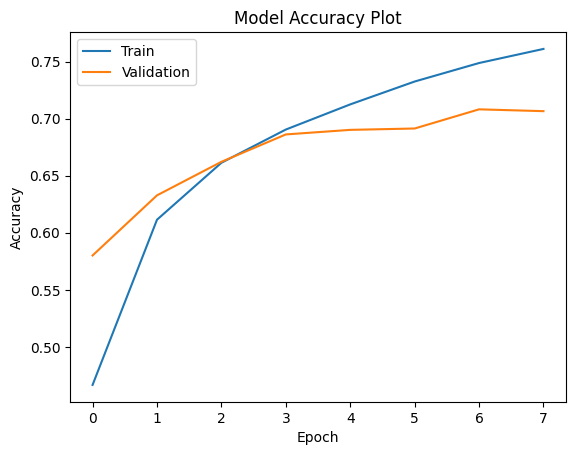

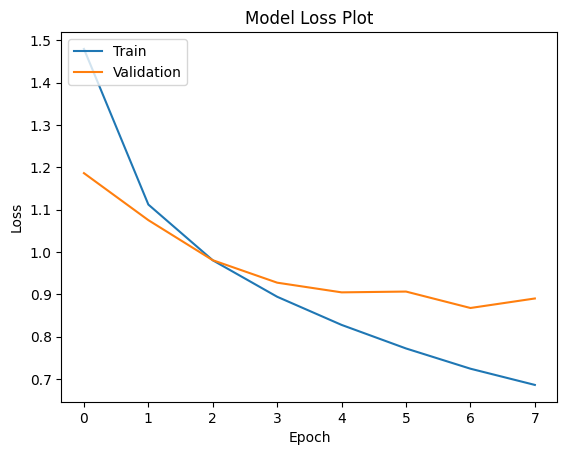

In [12]:
# Graph for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Graph for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
# Evaluate the model's accuracy on test set
print("Accuracy:")
cnn.evaluate(images_test,labels_test)

Accuracy:
313/313 [==============================] - 1s 2ms/step - loss: 0.8900 - accuracy: 0.7066


[0.8900312781333923, 0.70660001039505]

In [14]:
# Predict labels of training images
probabilities = cnn.predict(images_test)

# The predict() function returns an array of probabilities 
# indicating the likelihood of each label for the test image at that index
print("Probability Array:")
print(probabilities)

313/313 [==============================] - 1s 2ms/step
Probability Array:
[[7.9617519e-03 9.0055393e-05 9.4486173e-04 ... 1.6625634e-04
  8.6174384e-02 5.7605947e-03]
 [1.0169607e-01 1.0795504e-01 4.1591964e-04 ... 1.9064474e-07
  7.8841889e-01 1.5102198e-03]
 [2.2873239e-01 1.2059878e-01 8.9207612e-04 ... 2.4159673e-04
  6.4592582e-01 3.0860878e-03]
 ...
 [1.0751112e-04 2.2846809e-06 4.8287667e-02 ... 7.2148964e-02
  1.4690186e-05 1.2512889e-05]
 [2.3069701e-01 5.4231435e-01 2.1159079e-02 ... 3.3880232e-04
  1.0538092e-03 6.9458052e-03]
 [5.2842511e-06 4.3653336e-06 1.2734244e-04 ... 9.9851340e-01
  6.2807530e-08 2.6225247e-05]]


In [15]:
# The argmax function returns the index of the largest number in a list
print("Arg Max Example:")
print(np.argmax([2, 7, 5]))

predictions = [np.argmax(p) for p in probabilities]

Arg Max Example:
1


In [16]:
# Extra: A function that determines if a model correctly predicted the label
# for a specific image

def correct(index):
    if (predictions[index] == labels_test[index]):
        print("Correct Prediction: ", classes[predictions[index]])
    else:
        print("Incorrect Prediction: ", classes[predictions[index]])
        print("Actual: ", classes[labels_test[index]])

In [17]:
correct(12)

Correct Prediction:  dog


In [18]:
correct(0)

Correct Prediction:  cat


In [19]:
correct(150)

Incorrect Prediction:  automobile
Actual:  ship


In [20]:
correct(28)

Correct Prediction:  truck
